In [35]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

# 4.6.1 The Stock Market Data
We will begin by examining some numerical and graphical summaries of the **Smarket** data.

In [3]:
smarket = pd.read_csv('../data/Smarket.csv', 
                       na_values='?',
                       index_col=0)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
# Check whether there are some missing values
smarket.isna().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [7]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [8]:
# Check the types of variables
smarket.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [10]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [13]:
smarket['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

In [14]:
smarket.shape

(1250, 9)

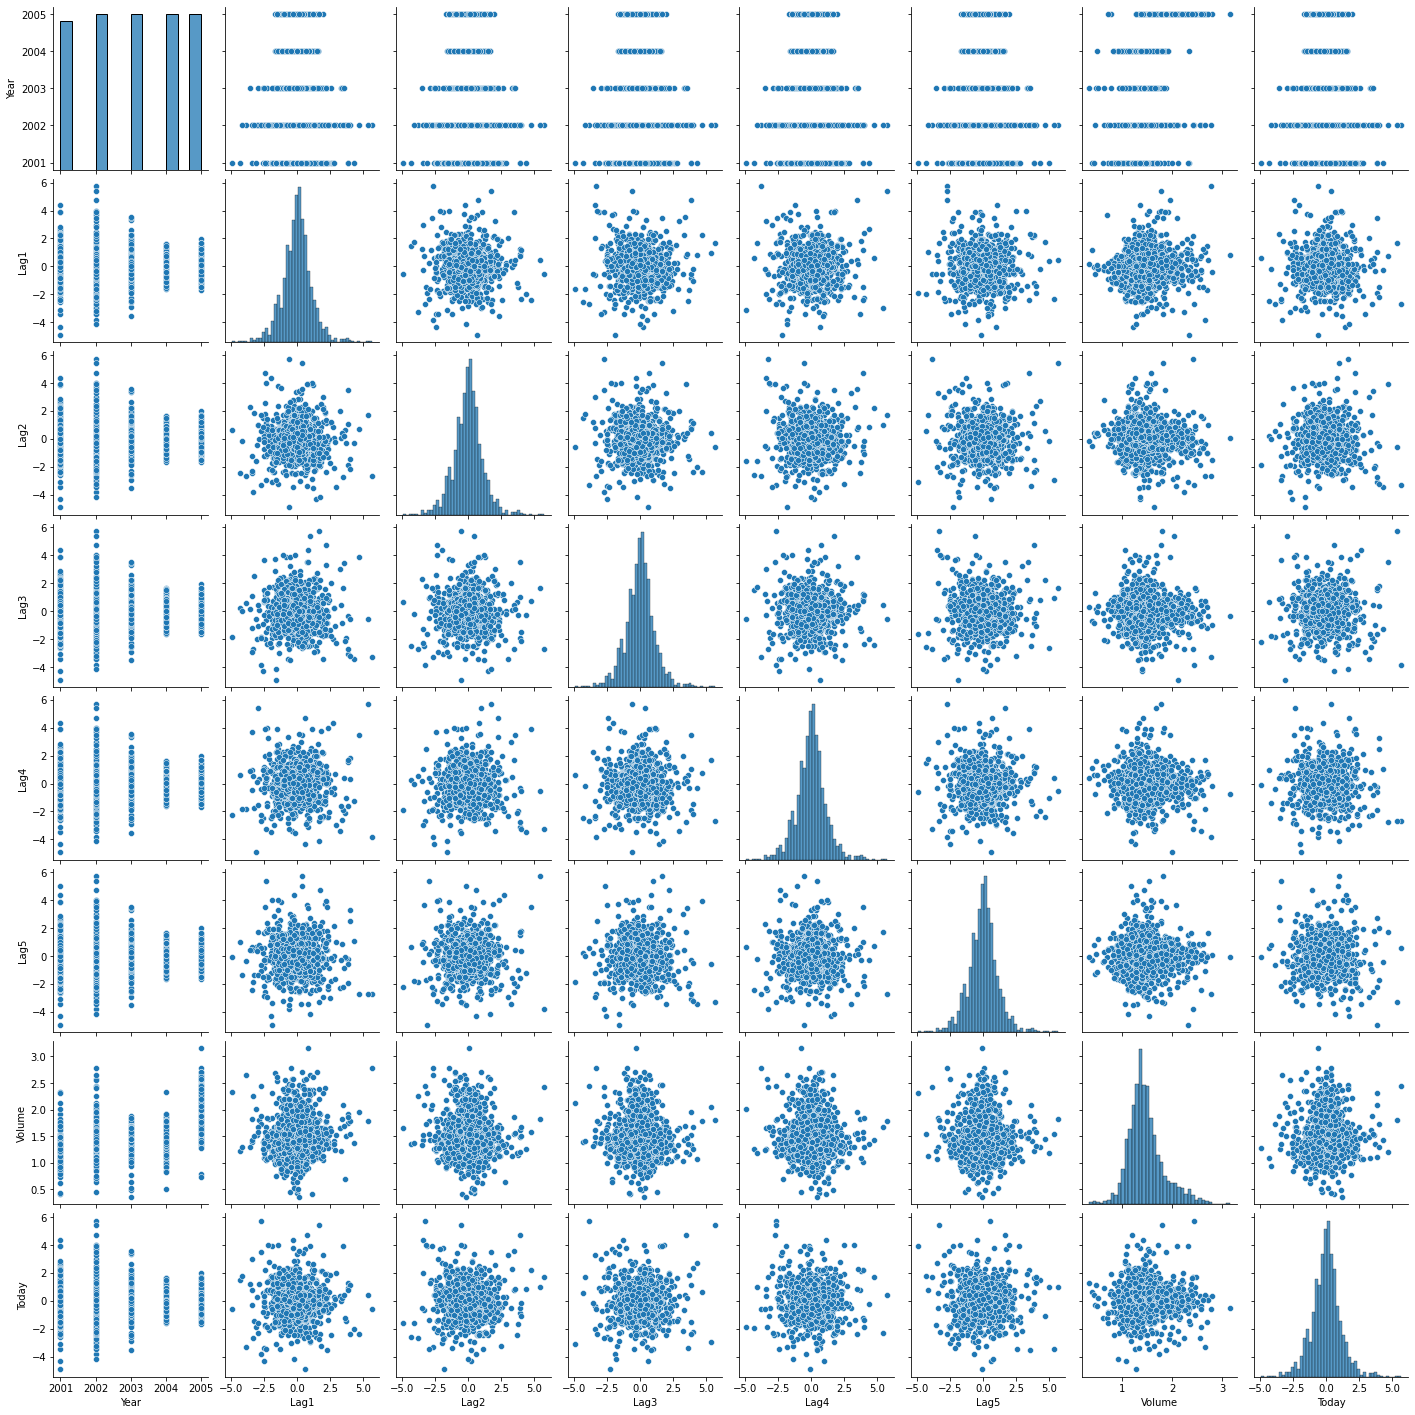

In [16]:
sns.pairplot(smarket);

To calculate the correlation matrix, we should choose only the quantitative variables:

In [20]:
smarket.select_dtypes(include=['number']).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


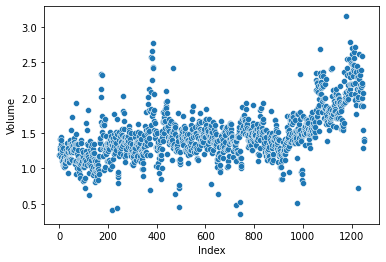

In [31]:
X = np.arange(1, len(smarket['Volume'])+1)
sns.scatterplot(x=X, y=smarket['Volume'])
plt.xlabel('Index');

# 4.6.2 Logistic Regression
Next, we will fit a logistic regression model in order to predict **Direction** using **Lag1** through **Lag5** and **Volume**. In `statsmodels`, we can use `smf.glm()` function to do the logistic regression in a similar way to `smf.ols()`, except that we must pass in the argument `family=sm.families.Binomial()` in order to run a logistic regression rather than some other type of generalized linear model.

In [36]:
lg_fit = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume',
                 smarket,
                 family=sm.families.Binomial()).fit()
lg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Thu, 24 Dec 2020   Deviance:                       1727.6
Time:                                          22:42:32   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

Compared to the summary in `R`, we can see that the coefficients and z-values negate

In [41]:
pd.get_dummies(smarket['Direction'])

,Down,Up
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
...,...,...
1246,0,1
1247,1,0
1248,0,1
1249,1,0


In [42]:
lg_fit.fittedvalues

1       0.492916
2       0.518532
3       0.518861
4       0.484778
5       0.489219
          ...   
1246    0.480108
1247    0.494074
1248    0.460732
1249    0.473882
1250    0.482083
Length: 1250, dtype: float64